# Exercise 4: Recognising handwritten digits

### The digits dataset
We will use the [Scikit-learn](https://scikit-learn.org/) `digits` dataset (`from sklearn.datasets import load_digits`).
This dataset consists of 8×8 images of handwritten digits (0–9). There are 1797 total samples, each belonging to one of 10 classes (digits 0–9). Each image can be thought of as 64 features (the pixel intensities) when flattened.

We aim to build classification models that can accurately predict which digit an image represents.


## Exercises
1. **Load** the digits dataset and **print** the shape of the data and the target.
2. **Display** the first ten images in the training set along with their **corresponding target** values.
3. **Split** the dataset into a training and test set and **train** a logistic regression classifier (using multinomial extension) on the dataset. **Evaluate** its accuracy.
4. Write code that **draws one random image** from the test set, **displays** this image, and **prints the predicted value** of the digit.
5. **Train alternative classifiers** and compare their accuracy to the logistic regression classifier. Suggested models:
    - Decision Tree
    - K-Nearest Neighbors
    - Naive Bayes
    - Support Vector Machine (not covered in detail in this course)
6. **Tune hyperparameters** (e.g., `max_depth` for Decision Tree, `n_neighbors` for KNN, etc.) to see if you can **improve** the accuracy of the classifiers.
7. (Optional) If you'd like to try a **larger dataset**, explore the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which contains 70,000 images of handwritten digits.


In [15]:
# Solution 1
# Step 1: Load the digits dataset and print its shape.

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

print("Shape of digits.data:", np.shape(digits.data))
print("Shape of digits.target:", np.shape(digits.target))

# The data has 1797 samples and 64 features (8×8 pixels), and 1797 corresponding target labels.

Shape of digits.data: (1797, 64)
Shape of digits.target: (1797,)


In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Questions/Extensions
1. Why does each image become 64 features when flattened?
2. What does the `digits.target` array represent in terms of the classification task?
3. How might the shape of the data change if you were to use a higher-resolution image for each digit?


The `.target` array gives the ground-truth digit (0–9) for each sample. Below we can inspect its contents.

In [16]:
print("Target array:")
print(digits.target)  # This will show the correct digit class for each sample

Target array:
[0 1 2 ... 8 9 8]


We can also access each original image in an `(8×8)` pixel format. Here is the first image in the dataset (in array form).

In [3]:
print("First image in digits.images:")
print(digits.images[2])

First image in digits.images:
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


The classification task is to predict which digit (0–9) the image represents based on these pixel intensities.
Below, we visualize the first **10 images** of the dataset alongside their target labels.

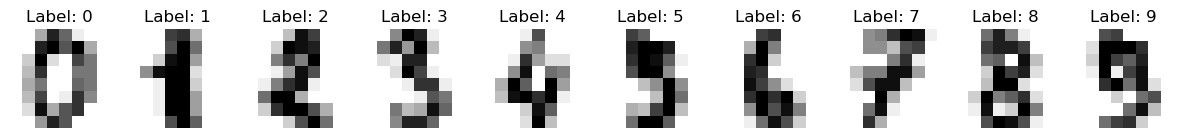

In [17]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)
    ax.axis('off')

plt.show()

Below, we use **multinomial logistic regression** to classify the digits. When the outcome variable has multiple classes, standard logistic regression is extended to handle more than two outcomes.

In [5]:
# Solution 3
# Train a (multinomial) logistic regression classifier on the dataset and evaluate its accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Flatten the images into vectors of size 64 (8x8)
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Split the data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model (the default is multinomial logistic regression)
clf_lr = LogisticRegression(
    solver="lbfgs",
    max_iter=10000,
    random_state=42
)
# Train the model
clf_lr.fit(X_train, y_train)

# Evaluate the model
acc_lr = clf_lr.score(X_test, y_test)
print("Multinomial Logistic Regression Accuracy:", acc_lr)

Multinomial Logistic Regression Accuracy: 0.975


### Questions/Extensions
1. What do you think happens if we don’t **flatten** the images (i.e., if we don’t reshape `digits.images`)? How would the classifier handle the data?
2. Try changing the parameter `max_iter`. Does it affect convergence or accuracy?
3. Logistic Regression has a `C` parameter (inverse regularization strength). What happens if you vary `C` significantly?


We can now pick a **random image** from the **test set**, display it, and make a prediction using our trained logistic regression model.

Random image index: 233
True label for this image: 1


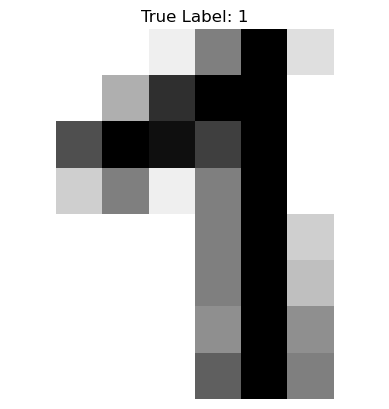

In [6]:
# Solution 4

import random

# Choose a random index from the test set
random_idx = random.choice(range(len(X_test)))

print("Random image index:", random_idx)
print("True label for this image:", y_test[random_idx])

# Reshape for display (8x8)
img_to_disp = X_test[random_idx, :].reshape(8, 8)
plt.imshow(img_to_disp, cmap=plt.cm.gray_r, interpolation="nearest")
plt.title("True Label: %i" % y_test[random_idx])
plt.axis('off')
plt.show()


In [7]:
# Make a prediction for the same image
prediction = clf_lr.predict(X_test[random_idx, :].reshape(1, -1))
print("Predicted Label:", prediction[0])

Predicted Label: 1


### Questions/Extensions
1. How often (qualitatively) do you see correct vs. incorrect predictions if you keep running the random selection?
2. Try displaying the **raw feature vector** (64 values) of a random image. How do you interpret these values?
3. What does `clf_lr.predict_proba(...)` return, and how could you interpret it?


Now let’s train **alternative classifiers** and compare their accuracies with the logistic regression baseline.

In [8]:
# Solution 5a: Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# Evaluate on the test set
acc_dt = clf_dt.score(X_test, y_test)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.8416666666666667


### Questions/Extensions
1. How does this Decision Tree accuracy compare with Logistic Regression?
2. Inspect the parameters of the decision tree using `clf_dt.get_params()`. Which parameters might be most critical to adjust?
3. How might a deeper tree (larger `max_depth`) affect bias vs. variance?


In [9]:
# Solution 5b: K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

# Evaluate on the test set
acc_knn = clf_knn.score(X_test, y_test)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.9861111111111112


### Questions/Extensions
1. The default value for `n_neighbors` is 5. Experiment with other values (e.g., 3, 7, 10). Do you see any accuracy changes?
2. KNN can be slow for large datasets because it stores all training data. What might be a remedy?
3. How does KNN’s decision boundary concept differ from Decision Trees?


In [10]:
# Solution 5c: Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Evaluate on the test set
acc_nb = clf_nb.score(X_test, y_test)
print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.9111111111111111


### Questions/Extensions
1. Unlike other models, Naive Bayes assumes feature independence. Where might this assumption break down for image data?
2. What are the main differences between `MultinomialNB` and `GaussianNB`?
3. Could you apply `MultinomialNB` directly to raw pixel intensities on a more complex dataset (e.g. colored images)? Why or why not?


In [11]:
# Solution 5d: Support Vector Machine (SVM)

from sklearn.svm import SVC

# Train an SVM classifier
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

# Evaluate on the test set
acc_svm = clf_svm.score(X_test, y_test)
print("SVM Accuracy:", acc_svm)

SVM Accuracy: 0.9861111111111112


### Questions/Extensions
1. The default kernel for `SVC` is the RBF kernel. Try another kernel (e.g., `linear` or `poly`). Does accuracy change?
2. SVMs can be sensitive to scaling. How might you preprocess the data for improved performance?
3. Could SVMs scale well to the larger MNIST dataset?


## Hyperparameter Tuning
Below, we manually loop over some candidate hyperparameters for **Decision Tree** and **KNN**, printing out the accuracy. This is a simple approach. One can also use Scikit-learn’s `GridSearchCV` or `RandomizedSearchCV` for a more systematic tuning process.

In [12]:
# Solution 6: Hyperparameter tuning (Decision Tree)

param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 6, 10]
}

dtc = DecisionTreeClassifier(random_state=42)

print("Decision Tree Hyperparameter Tuning:\n")
for max_depth in param_grid_dt['max_depth']:
    for min_samples_split in param_grid_dt['min_samples_split']:
        dtc.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
        dtc.fit(X_train, y_train)
        score = dtc.score(X_test, y_test)
        print(f"max_depth={max_depth}, min_samples_split={min_samples_split} => Accuracy: {score:.4f}")

Decision Tree Hyperparameter Tuning:

max_depth=10, min_samples_split=2 => Accuracy: 0.8500
max_depth=10, min_samples_split=6 => Accuracy: 0.8583
max_depth=10, min_samples_split=10 => Accuracy: 0.8333
max_depth=20, min_samples_split=2 => Accuracy: 0.8417
max_depth=20, min_samples_split=6 => Accuracy: 0.8528
max_depth=20, min_samples_split=10 => Accuracy: 0.8250
max_depth=None, min_samples_split=2 => Accuracy: 0.8417
max_depth=None, min_samples_split=6 => Accuracy: 0.8528
max_depth=None, min_samples_split=10 => Accuracy: 0.8250


### Questions/Extensions
1. Which combination of parameters gives the highest accuracy? Are there multiple parameter sets with similar performance?
2. If you were to use `GridSearchCV`, how would it streamline this process?
3. What other hyperparameters might matter for decision trees?


In [13]:
# K-Nearest Neighbors Hyperparameter Tuning

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11,60]
}

knn = KNeighborsClassifier()

print("\nKNN Hyperparameter Tuning:\n")
for n_neighbors in param_grid_knn['n_neighbors']:
    knn.set_params(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"n_neighbors={n_neighbors} => Accuracy: {score:.4f}")


KNN Hyperparameter Tuning:

n_neighbors=3 => Accuracy: 0.9833
n_neighbors=5 => Accuracy: 0.9861
n_neighbors=7 => Accuracy: 0.9889
n_neighbors=9 => Accuracy: 0.9806
n_neighbors=11 => Accuracy: 0.9833
n_neighbors=60 => Accuracy: 0.9472


### Questions/Extensions
1. How does changing the number of neighbors affect the bias-variance tradeoff?
2. If you had a **much larger** training set, would KNN potentially perform better or worse?
3. Can you combine KNN with dimensionality reduction (e.g., PCA) for potentially faster predictions?
